Importing Libraries

In [2]:

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

In [3]:
# Creating DataFrame
df = pd.read_csv("ML_Dataset - Sheet1.csv")

# Addition of skills to each row randomly
skill = ['Python', 'Java', 'Web Dev', 'Cybersecurity', 'SQL', 'Power BI', 'Excel']
df['Skills']= np.random.choice(skill, len(df))

df.to_csv("ML_Dataset_with_Skills.csv", index=False)


In [5]:
# Creating DataFrame
df = pd.read_csv("ML_Dataset - Sheet1.csv")

Softskill = ['Communication','Teamwork','Problem-solving','Time management','Interpersonal skills','Creativity']
df['SoftSkills']= np.random.choice(Softskill, len(df))

df.to_csv("ML_Dataset_with_Skills.csv", index=False)

Clustering the data

    Unnamed: 0.3  Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0                 Name  \
0              0             0             0           0        Aastha Londhe   
1              1             1             1           1            Abhijna N   
2              2             2             2           2  Adithya Maradithaya   
3              3             3             3           3       Aditya Patil T   
4              4             4             4           4   Ambika Jayashanthi   
..           ...           ...           ...         ...                  ...   
67            67            67            67          67   Vishanth S Chandan   
68            68            68            68          68      Y. Nidhi Shenoy   
69            69            69            69          69    Jyothii R. Moolya   
70            70            70            70          70     Prakash L Waddar   
71            71            71            71          71          Prajwal G S   

           USN             

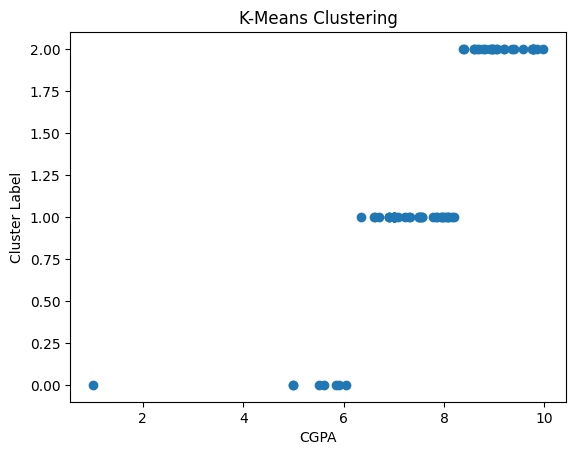

In [3]:
# Extract the data from the selected column
data_to_cluster = df['CGPA'].values.reshape(-1, 1)  # Reshape to 2D array

# Define the number of clusters (k)
k = 3

# Create a KMeans instance
kmeans = KMeans(n_clusters=k, random_state=0)

# Fit the model to the data
kmeans.fit(data_to_cluster)

# Get the cluster labels assigned to each data point
cluster_labels = kmeans.labels_

# Add a new column 'Cluster' to the DataFrame containing the cluster labels
df['Cluster'] = cluster_labels

# Print the DataFrame with cluster labels (optional)
print(df)

# Visualization (scatter plot)
plt.scatter(df['CGPA'], cluster_labels)  # Data on x-axis, labels on y-axis

# Add labels and title
plt.xlabel('CGPA')
plt.ylabel("Cluster Label")
plt.title("K-Means Clustering")

plt.show()

In [4]:
df.drop('new_skill', axis=1, inplace=True)
df.drop('Skills_new', axis=1, inplace=True)
df.to_csv('ML_Dataset.csv')

In [5]:
replacing_value = {'Python': 0, 'SQL': 1, 'Java': 2, 'ReactJS': 3, 'Web Dev': 4, 'Cybersecurity': 5, 'Power BI': 6, 'Excel': 7}
df['Skill_label'] = df['Skills'].replace(replacing_value)


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_22516\326921788.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Skill_label'] = df['Skills'].replace(replacing_value)


Scatter Plot


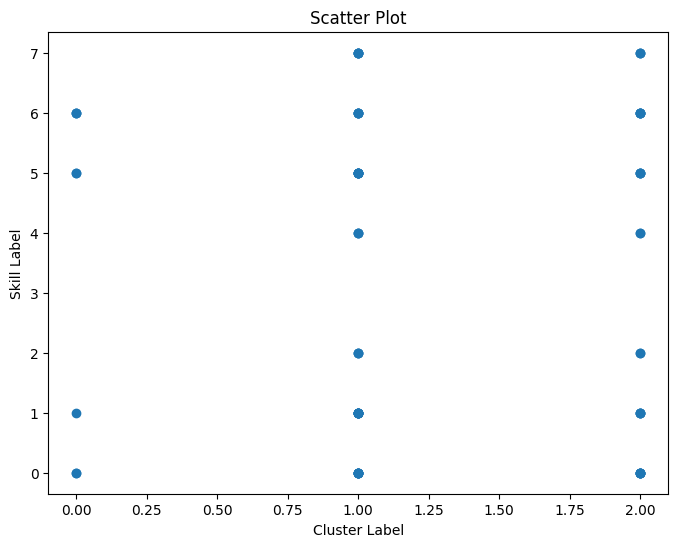

In [6]:
# Create the scatter plot
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.scatter(df['Cluster'], df['Skill_label'])

# Add labels and title
plt.xlabel('Cluster Label')
plt.ylabel('Skill Label')
plt.title('Scatter Plot')


plt.show()


C:\Users\Khyathi Shetty\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\_array_api.py:472: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
C:\Users\Khyathi Shetty\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\_array_api.py:489: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


TypeError: recommend_courses() missing 1 required positional argument: 'Name'

In [33]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

# Load data (assuming your CSV file is named 'placementdata.csv')
df = pd.read_csv("placementdata.csv")

# Check column names (ensure 'company_name' exists)
print(df.columns)

# Feature engineering (assuming numerical encoding for CGPA and TF-IDF for skills/softskills)
# ... (replace these comments with your specific feature engineering steps)

# Separate categorical features (assuming 'student_name' and 'company_name')
categorical_features = ['Name', 'Company']
categorical_data = df[categorical_features]

# One-hot encode categorical features
encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(categorical_data)

# Combine numerical and encoded data
X = pd.concat([df[['CGPA']], pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())], axis=1)
y = df['Target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision tree model
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Make predictions
predictions = dt_classifier.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, pos_label='Yes')
recall = recall_score(y_test, predictions, average='macro')
conf_matrix = confusion_matrix(y_test, predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-measure:", f1)
print("Confusion Matrix:\n", conf_matrix)


Index(['Name', 'Skills', 'CGPA', 'Soft Skills', 'Company', 'Target'], dtype='object')


TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [16]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
data=pd.read_csv("placementdata.csv")
df = pd.DataFrame(data)

from sklearn.preprocessing import MinMaxScaler
# Define numerical columns for scaling (assuming others are non-numerical)
numerical_cols = [col for col in df.columns if df[col].dtype != 'object']

# Create a MinMaxScaler and fit/transform the numerical columns
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numerical_cols]))

def cosine_similarity(df):
    return df.T.dot(df)  # Calculate dot product for transposed matrix

# Define a function to generate recommendations
def recommend_courses(df, Name, k=3, reco_method='average_rating', metric=cosine_similarity):
    similarity_matrix = metric(df_scaled if 'scaled' in locals() else df)  # Use scaled data if available
    neighbors = NearestNeighbors(n_neighbors=k, algorithm='brute').fit(similarity_matrix)

   
    # Get all unique names from the "Names" column
    names = df["Names"].unique().tolist()

    # Loop through each name and generate recommendations
    for name in names:
        user_index = df.index.get_loc(name)  # Find the index of the user (name)

        # Handle potential errors if the name doesn't exist in the index
        if user_index is None:
            print(f"Name '{name}' not found in the dataset.")
            continue

        distances, indices = neighbors.kneighbors(df.iloc[[user_index]])
        neighbor_indices = indices.flatten()[1:]

        # Recommendation based on chosen method
        if reco_method == 'average_rating':
            recommended_courses = df.columns[df.iloc[neighbor_indices].mean(axis=0) > 0].tolist()
        elif reco_method == 'weighted_rating':
            # Implement weighted rating logic based on similarity scores (distances)
            pass
        else:
            raise ValueError(f"Invalid recommendation method: {reco_method}")

        print(f"Recommended courses for {name}: {recommended_courses}")

# Example usage
recommend_courses(df, k=3, reco_method='average_rating')

C:\Users\Khyathi Shetty\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\_array_api.py:472: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
C:\Users\Khyathi Shetty\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\_array_api.py:489: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


TypeError: recommend_courses() missing 1 required positional argument: 'Name'